# Домашнє завдання №11.

Створення рекурентної нейронної мережі за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

Застосувати наступні будови мережі: RNN, LSTM, двосторонню та глибоку.

Порівняйти результати та зробити висновки.

#### 1. Завантаження та підготовка даних

In [1]:
from keras.utils import pad_sequences
from tensorflow import keras
from keras.datasets import imdb

In [2]:
# Встановлюємо гіперпараметри
max_features = 15000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [3]:
# Завантаження даних
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів.
# Залишаться лише ті слова, які зустрічаються не менше 15 000 разів, більш рідкісні будуть проігноровані.
# Це обмеження слів призначене для зменшення розміру векторів слів, що полегшує роботу з моделями

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# Передпроцесинг послідовних даних
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

#### 2. Рекурентна модель RNN

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics

In [ ]:
model = Sequential([
    Embedding(max_features, 32),
    # додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    SimpleRNN(16, activation="relu"),
    # додавання SimpleRNN шару з 16 вузлами, макс. довж. послідовності 500, величиною словника 10000
    Dense(1, activation='sigmoid')  # для бінарної класифікації
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          480000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 480801 (1.83 MB)
Trainable params: 480801 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


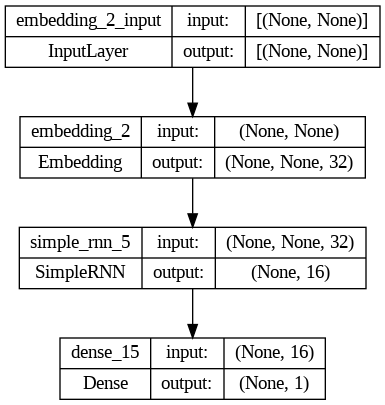

In [ ]:
# Візуалізуємо шарову структуру моделі
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model_name = 'model_RNN'

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
157/157 [==============================] - 28s 169ms/step - loss: 0.6722 - acc: 0.5978 - val_loss: 47.7581 - val_acc: 0.5062
Epoch 2/10
157/157 [==============================] - 29s 185ms/step - loss: 0.7714 - acc: 0.7753 - val_loss: 0.4281 - val_acc: 0.7928
Epoch 3/10
157/157 [==============================] - 28s 178ms/step - loss: 0.3792 - acc: 0.8508 - val_loss: 0.3560 - val_acc: 0.8482
Epoch 4/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2845 - acc: 0.8848 - val_loss: 0.3424 - val_acc: 0.8584
Epoch 5/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2429 - acc: 0.9082 - val_loss: 0.3662 - val_acc: 0.8342
Epoch 6/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2263 - acc: 0.9202 - val_loss: 0.3065 - val_acc: 0.8862
Epoch 7/10
157/157 [==============================] - 26s 168ms/step - loss: 0.2177 - acc: 0.9358 - val_loss: 0.3031 - val_acc: 0.8844
Epoch 8/10
157/157 [==============================] - 

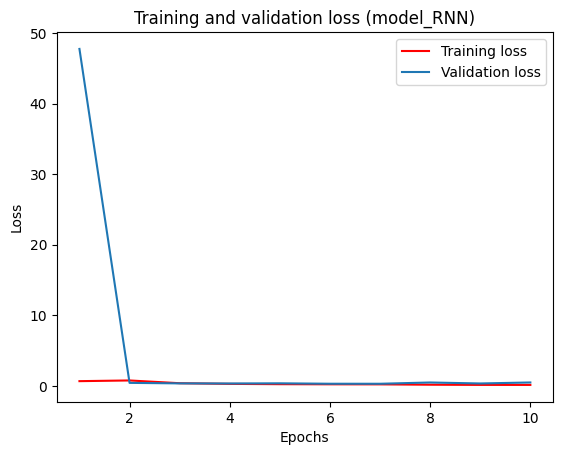

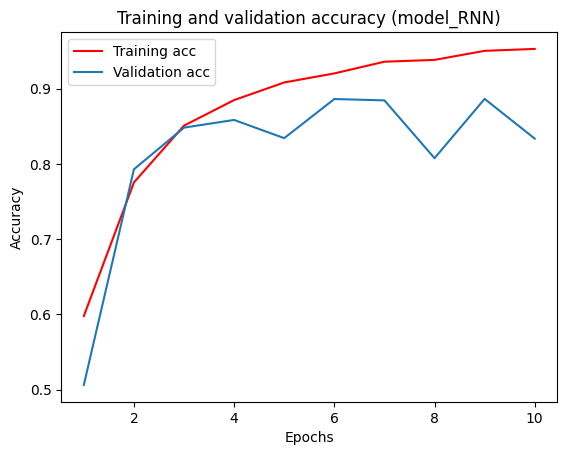

In [ ]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history
# print(history_dict.keys())

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['acc'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_acc'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### 3. Рекурентна модель LSTM

(Long Short-Term Memory) - це вид рекурентних нейронних мереж, який спроектований для розв'язання проблеми зниклого градієнта (vanishing gradient problem), яка виникає при навчанні та тренуванні класичних RNN (рекурентних нейронних мереж)

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
from keras.regularizers import l2

In [ ]:
model = Sequential([
    Embedding(max_features, output_dim=32, input_length=maxlen),
    # додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    Dropout(0.5),
    LSTM(64, activation="tanh"),
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # для бінарної класифікації
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 500, 32)           480000    
                                                                 
 dropout_32 (Dropout)        (None, 500, 32)           0         
                                                                 
 lstm_13 (LSTM)              (None, 64)                24832     
                                                                 
 dense_41 (Dense)            (None, 128)               8320      
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 1)                 129       
                                                                 
Total params: 513281 (1.96 MB)
Trainable params: 5132

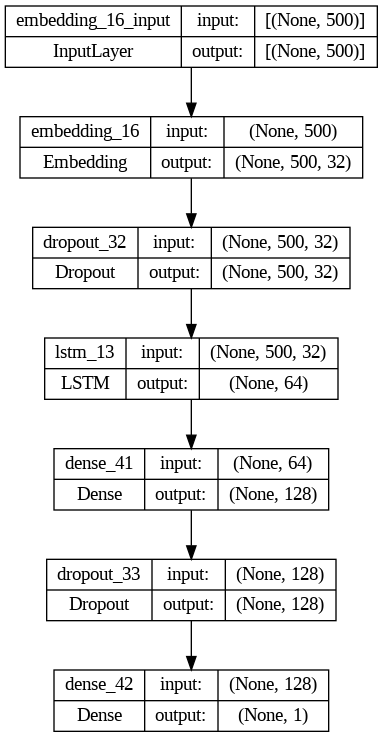

In [ ]:
# Візуалізуємо шарову структуру моделі
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model_name = 'model_LSTM'

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
157/157 [==============================] - 150s 933ms/step - loss: 0.8685 - acc: 0.6777 - val_loss: 0.4743 - val_acc: 0.8236
Epoch 2/10
157/157 [==============================] - 134s 851ms/step - loss: 0.3337 - acc: 0.8816 - val_loss: 0.3112 - val_acc: 0.8730
Epoch 3/10
157/157 [==============================] - 134s 856ms/step - loss: 0.2288 - acc: 0.9225 - val_loss: 0.2906 - val_acc: 0.8896
Epoch 4/10
157/157 [==============================] - 143s 910ms/step - loss: 0.1825 - acc: 0.9394 - val_loss: 0.3153 - val_acc: 0.8750
Epoch 5/10
157/157 [==============================] - 133s 845ms/step - loss: 0.1454 - acc: 0.9531 - val_loss: 0.3478 - val_acc: 0.8884
Epoch 6/10
157/157 [==============================] - 144s 918ms/step - loss: 0.1171 - acc: 0.9658 - val_loss: 0.4042 - val_acc: 0.8788
Epoch 7/10
157/157 [==============================] - 142s 908ms/step - loss: 0.1103 - acc: 0.9674 - val_loss: 0.3846 - val_acc: 0.8850
Epoch 8/10
157/157 [============================

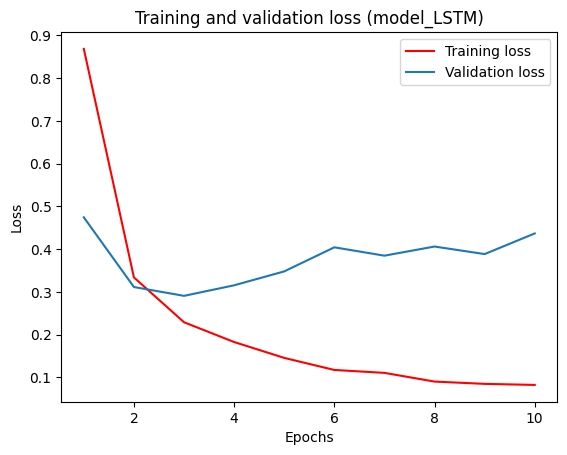

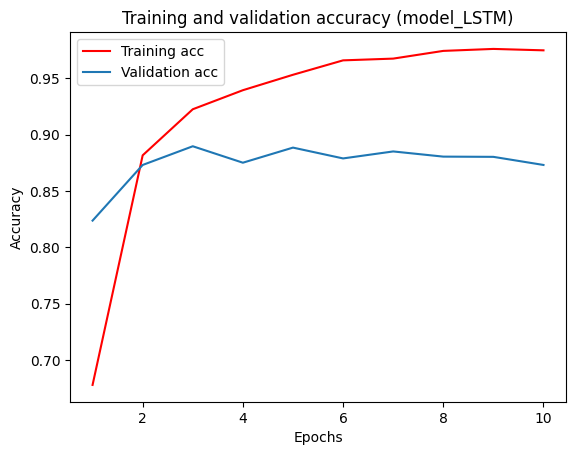

In [ ]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history
# print(history_dict.keys())

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['acc'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_acc'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Спостерігається перенавчання після третьої епохи.

#### 4. Двостороння рекурентна нейронна мережа (Bidirectional Recurrent Neural Network або BiRNN)

Тип нейронних мереж, який дозволяє моделі аналізувати вхідні дані в обидва напрямки: з початку до кінця і від кінця до початку


In [11]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
from keras.regularizers import l2

In [25]:
model = Sequential([
    Embedding(max_features, output_dim=32, input_length=maxlen),
    # додавання Embedding шару для перетворення слів в вектори фіксованої довжини
    Dropout(0.5),
    Bidirectional(LSTM(64, activation="tanh", return_sequences=True)),
    Bidirectional(LSTM(64, activation="tanh")),
    Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # для бінарної класифікації
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 32)           480000    
                                                                 
 dropout_14 (Dropout)        (None, 500, 32)           0         
                                                                 
 bidirectional_11 (Bidirect  (None, 500, 128)          49664     
 ional)                                                          
                                                                 
 bidirectional_12 (Bidirect  (None, 128)               98816     
 ional)                                                          
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_15 (Dropout)        (None, 128)              

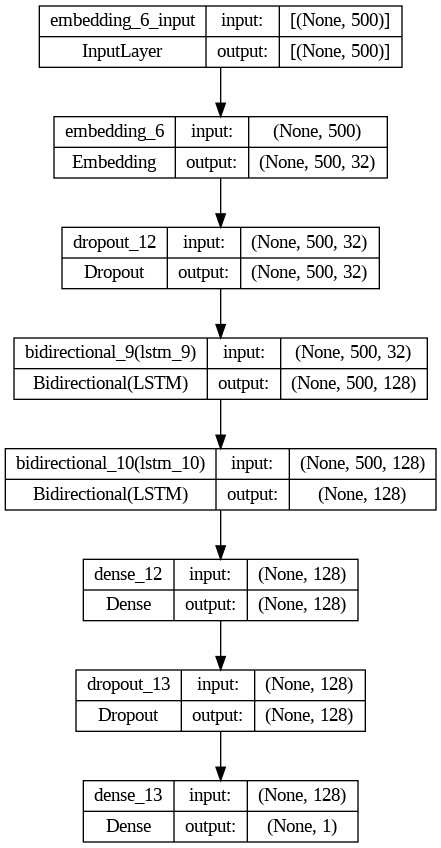

In [22]:
# Візуалізуємо шарову структуру моделі
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [23]:
model_name = 'model_BiRNN'

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
157/157 [==============================] - 331s 2s/step - loss: 0.9021 - acc: 0.7130 - val_loss: 0.4597 - val_acc: 0.8174
Epoch 2/10
157/157 [==============================] - 327s 2s/step - loss: 0.3287 - acc: 0.8829 - val_loss: 0.3404 - val_acc: 0.8770
Epoch 3/10
157/157 [==============================] - 325s 2s/step - loss: 0.2449 - acc: 0.9154 - val_loss: 0.3173 - val_acc: 0.8720
Epoch 4/10
157/157 [==============================] - 305s 2s/step - loss: 0.1774 - acc: 0.9399 - val_loss: 0.3501 - val_acc: 0.8618
Epoch 5/10
157/157 [==============================] - 325s 2s/step - loss: 0.1538 - acc: 0.9513 - val_loss: 0.3566 - val_acc: 0.8824
Epoch 6/10
157/157 [==============================] - 325s 2s/step - loss: 0.1162 - acc: 0.9643 - val_loss: 0.3906 - val_acc: 0.8762
Epoch 7/10
157/157 [==============================] - 325s 2s/step - loss: 0.1156 - acc: 0.9649 - val_loss: 0.3911 - val_acc: 0.8762
Epoch 8/10
157/157 [==============================] - 324s 2s/step - 

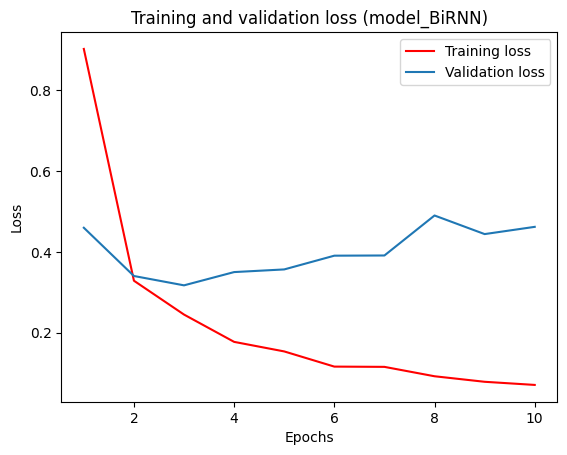

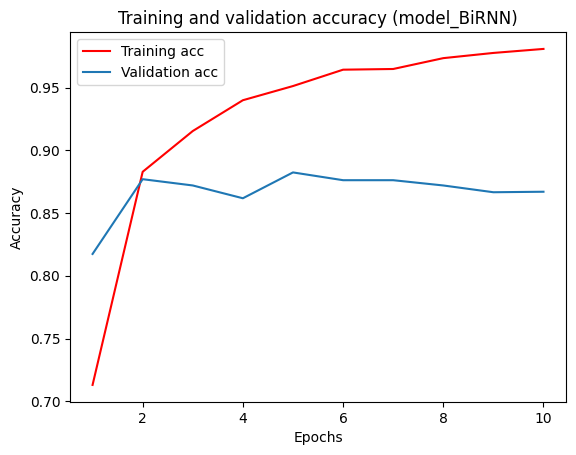

In [24]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history
# print(history_dict.keys())

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['acc'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_acc'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Спостерігається перенавчання після другої епохи.